In [7]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [9]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [10]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled = StandardScaler().fit_transform(market_data_df[['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 
                                                        'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y']])


In [11]:
# Create a DataFrame with the scaled data
new_df = pd.DataFrame(scaled, columns=['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 
                                        'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y'])
# Copy the crypto names from the original data
new_df['coin_id'] = market_data_df.index
# Set the coin_id column as the index (already done in the previous steps, so this is just to ensure)
new_df.set_index('coin_id', inplace=True)
# Display sample data
new_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [12]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))
# Create an empty list to store the inertia values

inertia = []
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list

# Create a dictionary with the data to plot the Elbow curve
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    k_model.fit(new_df)
    inertia.append(k_model.inertia_)
    
# Create a DataFrame with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
# Display the DataFrame

df_elbow.head(10)

c:\Users\moldr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\moldr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\moldr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\moldr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,68.243549
5,6,61.096844
6,7,50.255840
7,8,40.888474
8,9,32.768762
9,10,29.090066


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

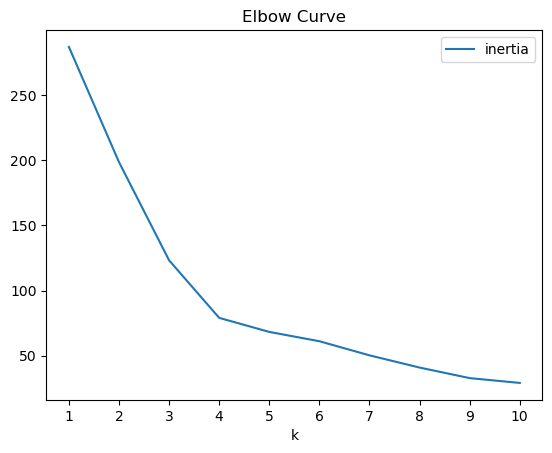

In [13]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** about the 75 range  right abovethe 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [14]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3, n_init='auto', random_state=1)

In [15]:
# Fit the K-Means model using the scaled data
model.fit(new_df)

c:\Users\moldr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=1)

In [16]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predict_new_df = model.predict(new_df)

# View the resulting array of cluster values.
print(predict_new_df)

[1 1 2 2 1 1 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 0 2 2 2 1
 2 2 2 2]


In [17]:
# Create a copy of the DataFrame
copy_new_df = new_df.copy()

In [18]:
# Add a new column to the DataFrame with the predicted clusters
copy_new_df["Prediction"] = predict_new_df

# Display sample data
copy_new_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Prediction
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


c:\Users\moldr\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1266: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

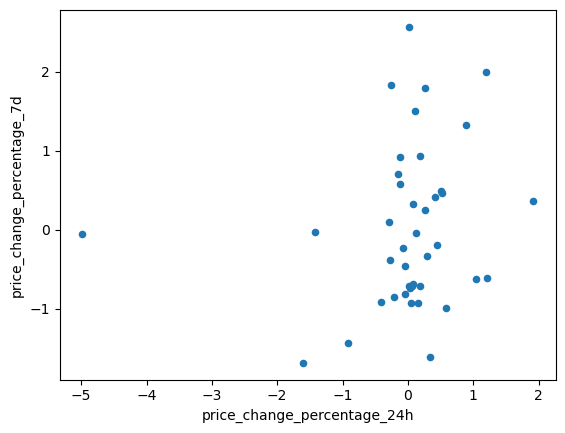

In [19]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
copy_new_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    colormap='rainbow')

### Optimize Clusters with Principal Component Analysis.

In [20]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [21]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
new_df_pca = pca.fit_transform(copy_new_df)

# View the first five rows of the DataFrame. 
new_df_pca[:5]

array([[-0.28335603,  1.00474894,  0.63675429],
       [-0.1898987 ,  0.61331663,  1.11604921],
       [-0.53807169, -0.1203216 , -0.65467802],
       [-0.57757304, -0.16226574, -0.49427025],
       [-0.54045376,  2.31925877,  1.94270063]])

In [22]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.36869659, 0.33695158, 0.18567919])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** .89132736

In [23]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
ccinfo_pca_df = pd.DataFrame(
    new_df_pca,
    columns=["PCA1", "PCA2", "PCA3"]
)

# Copy the crypto names from the original data
ccinfo_pca_df['coin_id'] = market_data_df.index

# Set the coinid column as index
ccinfo_pca_df.set_index('coin_id', inplace=True)

# Display sample data
ccinfo_pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.283356,1.004749,0.636754
ethereum,-0.189899,0.613317,1.116049
tether,-0.538072,-0.120322,-0.654678
ripple,-0.577573,-0.162266,-0.494270
bitcoin-cash,-0.540454,2.319259,1.942701


### Find the Best Value for k Using the PCA Data

In [24]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list


# Create a dictionary with the data to plot the Elbow curve
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(ccinfo_pca_df)
    inertia.append(k_model.inertia_)

# Create a DataFrame with the data to plot the Elbow curve
elbow_data_pca = {"k": k, "inertia": inertia}
df_elbow_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
df_elbow_pca.head()

c:\Users\moldr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\moldr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\moldr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\moldr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

,k,inertia
0,1,265.506857
1,2,174.527651
2,3,114.485912
3,4,49.451964
4,5,38.909044


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

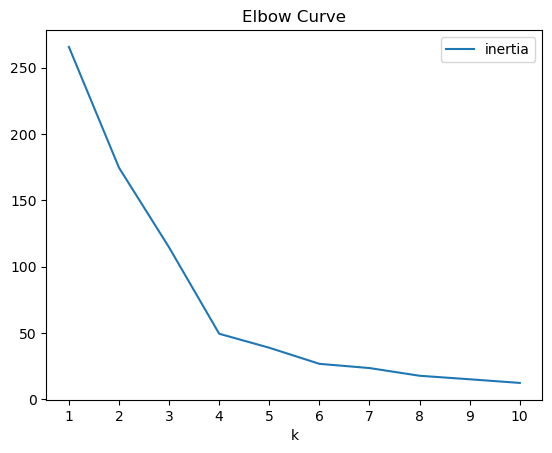

In [25]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow_pca.plot.line(x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** aboutthe 75 right above the 4 range again 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** slightly not much

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [26]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3, n_init='auto', random_state=1)

In [29]:
# Fit the K-Means model using the PCA data
model.fit(ccinfo_pca_df)

c:\Users\moldr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=1)

In [30]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predict_new_df_pca = model.predict(ccinfo_pca_df)

# Print the resulting array of cluster values.
print(predict_new_df_pca) #predict_new_df_pca

[1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 2 0 0 0 1
 0 0 0 0]


In [32]:
# Create a copy of the DataFrame with the PCA data
ccinfopredict_new_df_pca = ccinfo_pca_df.copy()
# Add a new column to the DataFrame with the predicted clusters
ccinfopredict_new_df_pca["crypto_cluster"] = predict_new_df_pca
# Display sample data
ccinfopredict_new_df_pca.head()

,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.283356,1.004749,0.636754,1
ethereum,-0.189899,0.613317,1.116049,1
tether,-0.538072,-0.120322,-0.654678,0
ripple,-0.577573,-0.162266,-0.494270,0
bitcoin-cash,-0.540454,2.319259,1.942701,1


<Axes: xlabel='PCA1', ylabel='PCA2'>

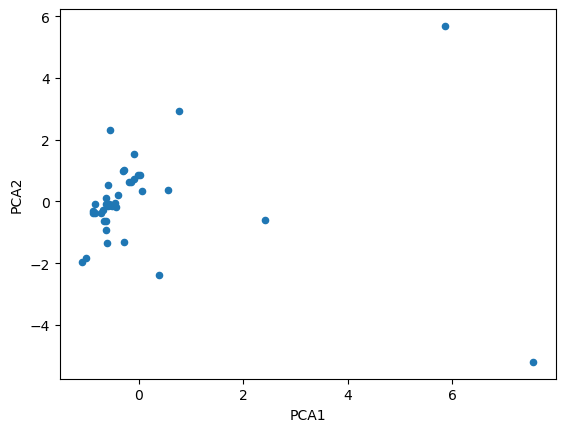

In [33]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
ccinfopredict_new_df_pca.plot.scatter(x="PCA1", y="PCA2")

### Determine the Weights of Each Feature on each Principal Component

In [50]:
# Use the columns from the original scaled DataFrame as the index.
ccinfopredict_new_df_pca = new_df[['price_change_percentage_24h', 'price_change_percentage_7d', 
                    'price_change_percentage_14d', 'price_change_percentage_30d', 
                    'price_change_percentage_60d', 'price_change_percentage_200d', 
                    'price_change_percentage_1y']].copy()
ccinfopredict_new_df_pca.set_index(new_df.index, inplace=True)

print(ccinfopredict_new_df_pca.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:**  price_change_percentage_24h   Positive Bit Coin Cash, Negative ripple
price_change_percentage_7d   Positive Bit Coin Cash, Negative ripple
price_change_percentage_14d   Positive Bit Coin Cash, Negative tether
price_change_percentage_30d   Positive Bit Coin Cash, Negative tether     
price_change_percentage_60d   Positive Bit tether, Negative ripple
price_change_percentage_200d  positive none Negative tether
price_change_percentage_1y   Positive none, Negative ripple